# GIỚI THIỆU THƯ VIỆN SEABORN

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
%matplotlib inline

In [2]:
sns.__version__

'0.11.2'

In [3]:
# load in data and save to a variable
#df = seaborn.load_dataset("tips")
df=pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


### Swarm plots

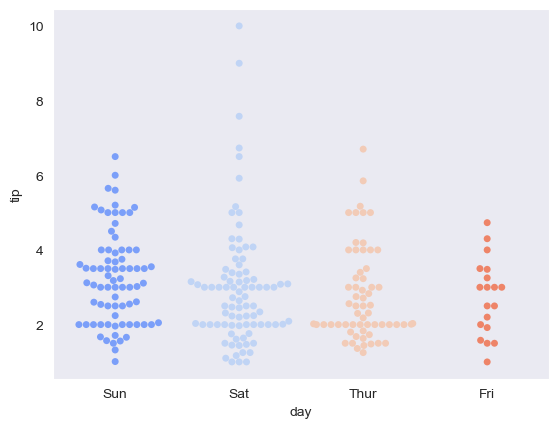

In [5]:
import warnings
warnings.filterwarnings('ignore')
seaborn.swarmplot(x="day", y="tip", data=df, palette="coolwarm")
seaborn.set_style("dark")
plt.show()


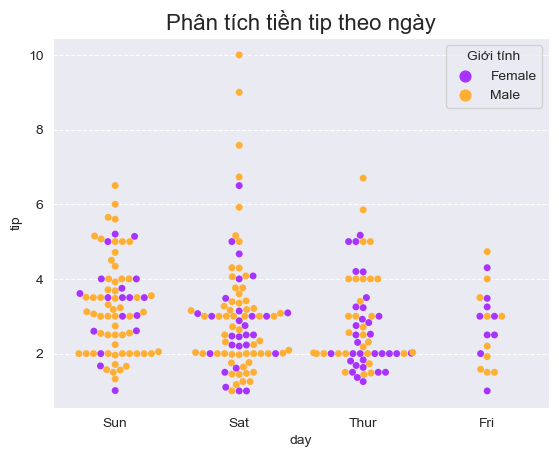

In [20]:
gender_palette = ["#A833FF", "#FFAF33"]
seaborn.swarmplot(x="day", y="tip", hue="sex", palette=gender_palette, data=df)
plt.title("Phân tích tiền tip theo ngày", fontsize=16)
plt.legend(title="Giới tính")
plt.grid(axis='y', linestyle='--', alpha=1)  # Thêm lưới ngang
plt.show()

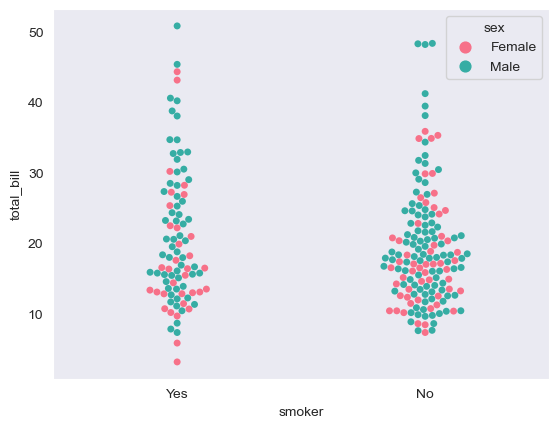

In [26]:
seaborn.swarmplot(x="smoker", y="total_bill", 
                  hue="sex", data=df, palette="husl", order=["Yes", "No"])
plt.show()

### Violin Plots

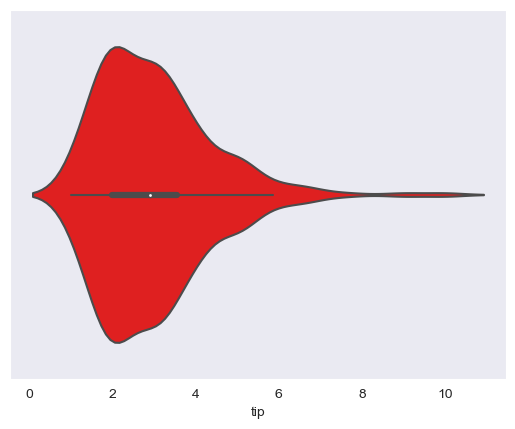

In [27]:
seaborn.violinplot(x = df["tip"], color="r")
plt.show()

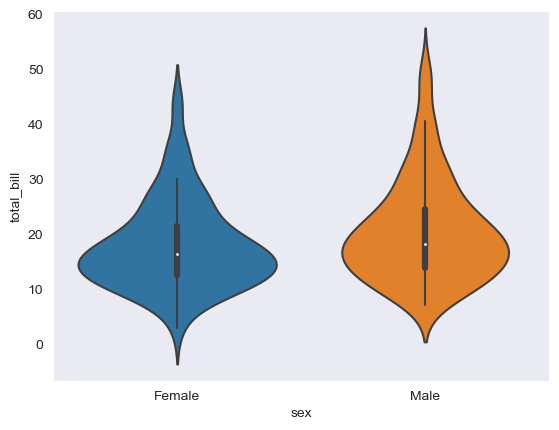

In [30]:
seaborn.violinplot(x = "sex",y ="total_bill",data=df)
plt.show()

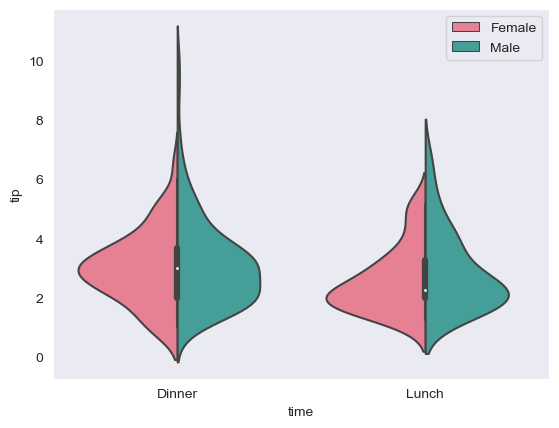

In [35]:
seaborn.violinplot(x = "time",y ="tip",data=df, 
                   hue ="sex",palette ="husl",split = True)
plt.legend()
plt.show()

# bài tập

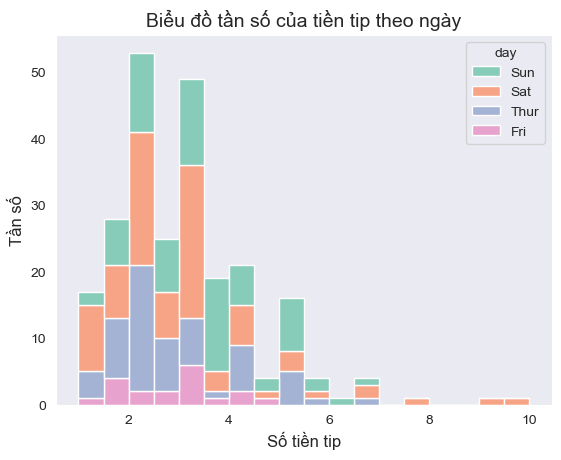

In [51]:
# Vẽ biểu đồ phân phối tần số của số tiền tip theo ngày
import seaborn as sns
import matplotlib.pyplot as plt

# Biểu đồ phân phối tần số của tiền tip theo từng ngày
sns.histplot(data=df, x="tip", hue="day", kde=False, multiple="stack", palette="Set2")

# Thêm tiêu đề và nhãn
plt.title("Biểu đồ tần số của tiền tip theo ngày", fontsize=14)
plt.xlabel("Số tiền tip", fontsize=12)
plt.ylabel("Tần số", fontsize=12)

# Hiển thị biểu đồ
plt.show()


### Facet Grids

In [36]:
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items

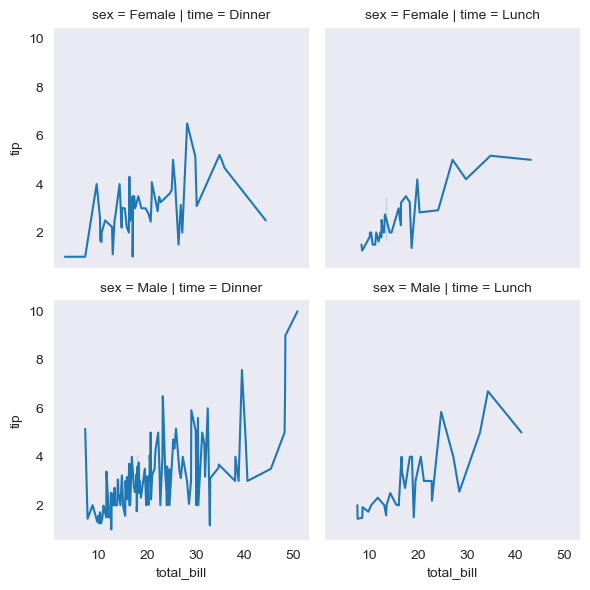

In [39]:
g = sns.FacetGrid(df, col="time",  row="sex")
g.map(sns.lineplot, "total_bill", "tip")

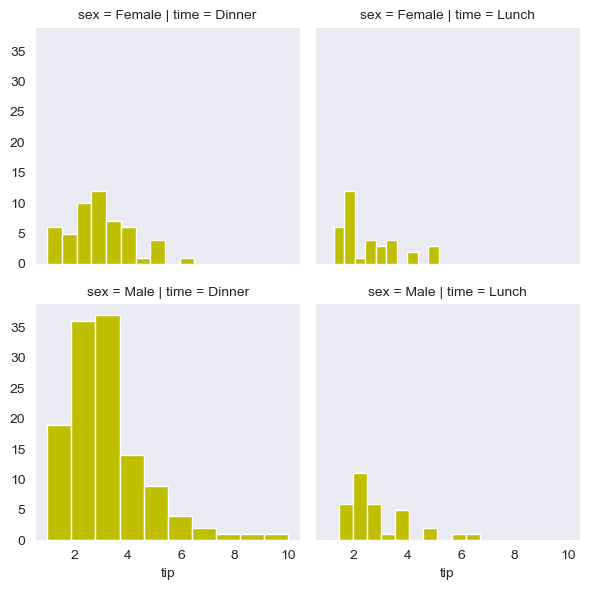

In [43]:
fg = seaborn.FacetGrid(df,col = "time",row = "sex")
fg = fg.map(plt.hist,"tip", color ="y")

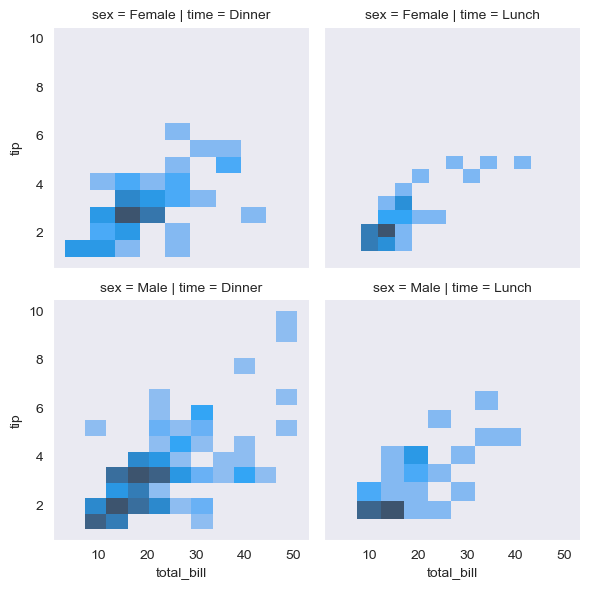

In [44]:
g = sns.FacetGrid(df, col="time",  row="sex")
g.map(sns.histplot, "total_bill", "tip")

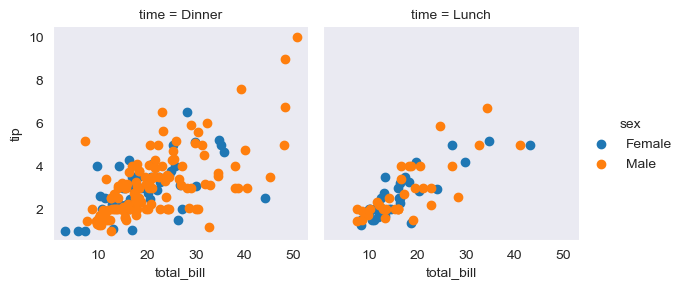

In [47]:
x = seaborn.FacetGrid(df, col="time", hue="sex")
x = x.map(plt.scatter,"total_bill","tip")
x =x.add_legend()

# Pair plot

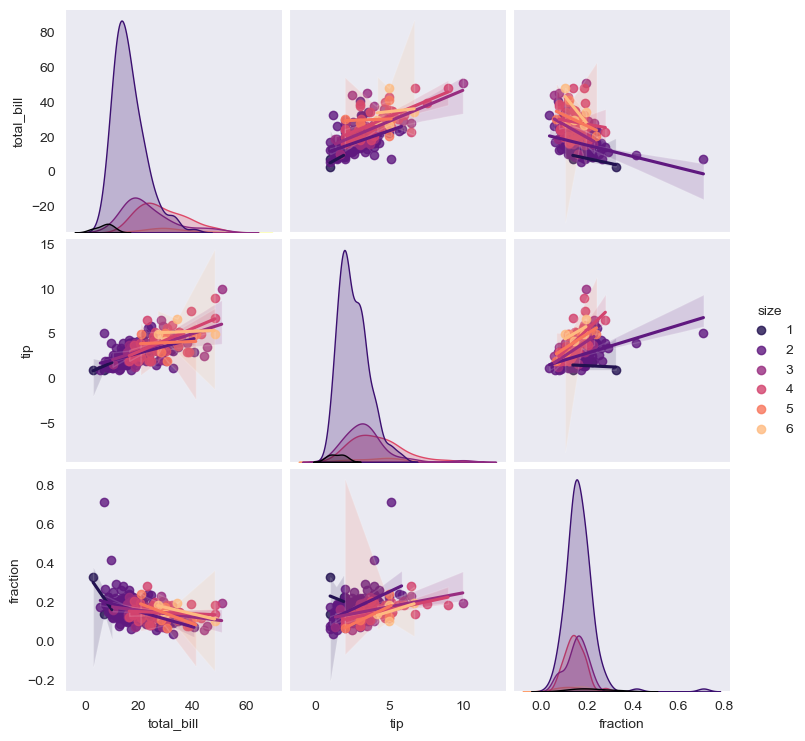

In [62]:
sns.pairplot(
    df, 
    hue="size", 
    vars=None, 
    kind="reg", 
    diag_kind="kde", 
    palette="magma", 
    markers=None, 
    height=2.5, 
    aspect=1
)

### Heat Maps

[[0.78107549 0.79628071 0.07783139]
 [0.69373072 0.70561998 0.00587663]
 [0.54671427 0.19570637 0.33103028]
 [0.15545136 0.16508407 0.44725586]
 [0.8633854  0.85920407 0.21838203]]


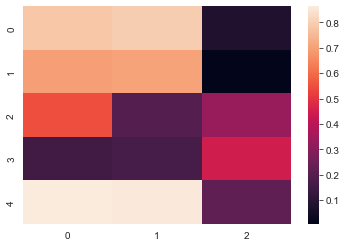

In [35]:
uniform_data = np.random.rand(5, 3) # five rows, 3 columns
print(uniform_data)
seaborn.heatmap(uniform_data)
plt.show()

In [41]:
flights = seaborn.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [48]:
flights_pivot = flights.pivot(index="month", columns="year", values="passengers")
flights_pivot.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


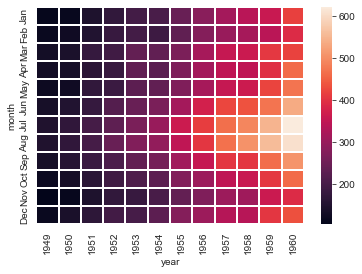

In [49]:
# draw border
x = seaborn.heatmap(flights_pivot, linewidths=0.3)

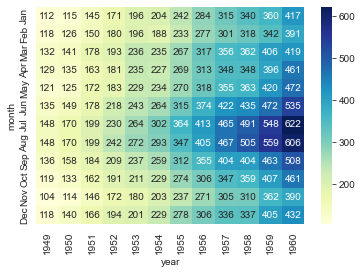

In [51]:
x = seaborn.heatmap(flights_pivot, annot=True, fmt="d", cmap="YlGnBu")

In [63]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


# tạo bảng 2 cột day, sex với phép toán sum với thuộc tính total_bill

sex   Female     Male
day                  
Fri   127.31   198.57
Sat   551.05  1227.35
Sun   357.70  1269.46
Thur  534.89   561.44


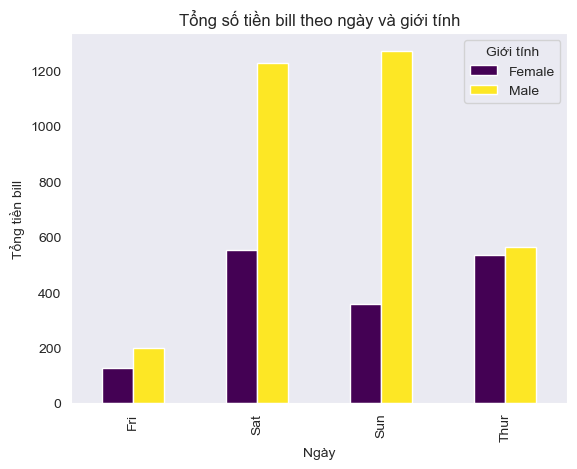

In [80]:


table = pd.pivot_table(df, index="day", columns="sex", values="total_bill", aggfunc="sum")
print(table)

table.plot(kind="bar", colormap="viridis")
plt.title("Tổng số tiền bill theo ngày và giới tính")
plt.ylabel("Tổng tiền bill")
plt.xlabel("Ngày")
plt.legend(title="Giới tính")
plt.show()


<AxesSubplot:xlabel='sex', ylabel='day'>

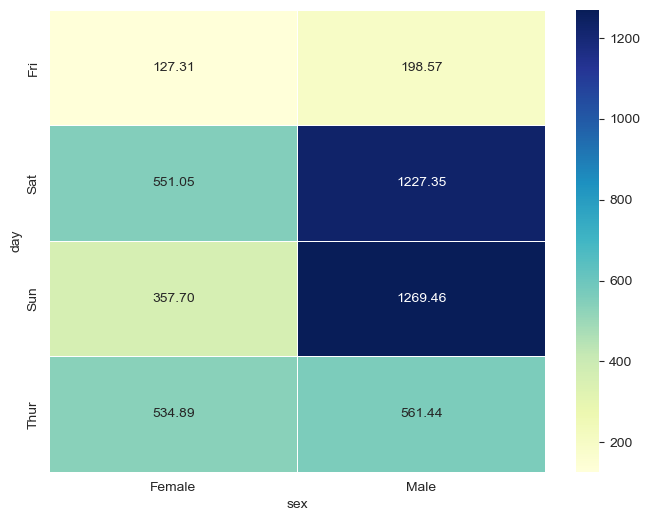

In [81]:
plt.figure(figsize=(8, 6))
sns.heatmap(table, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

### Box plot

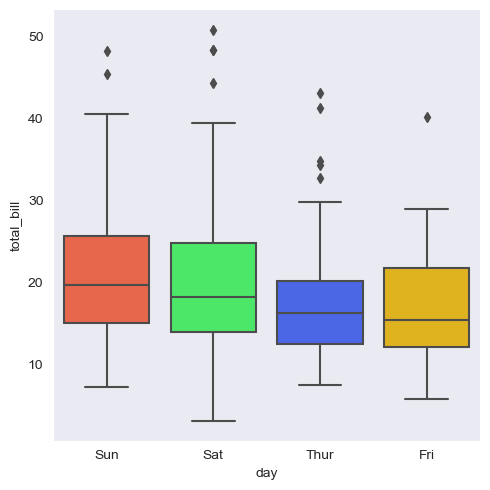

In [108]:
df=pd.read_csv('tips.csv')
df.head()
sns.catplot(data=df, x="day", y="total_bill", kind="box",palette=["#FF5733", "#33FF57", "#3357FF", "#FFC300"])

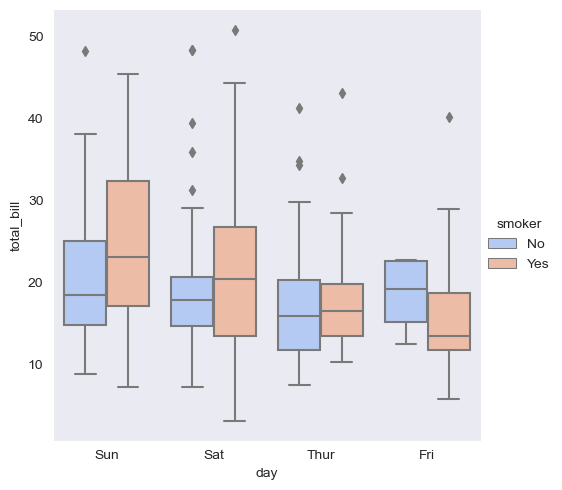

In [109]:

sns.catplot(data=df, x="day", y="total_bill", hue="smoker", kind="box",palette ="coolwarm" )

### Bar plot

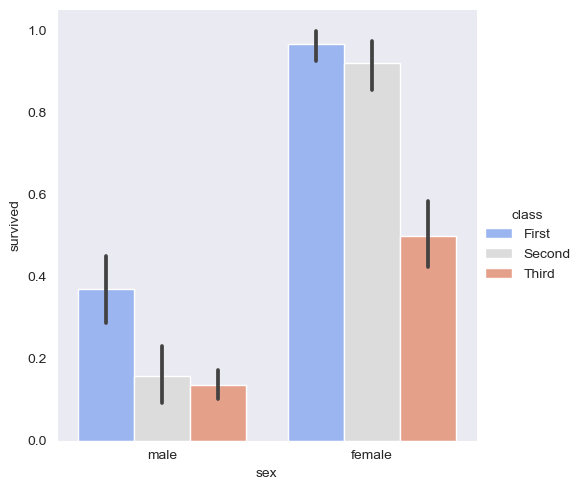

In [111]:
titanic = sns.load_dataset("titanic") 
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar", palette ="coolwarm")

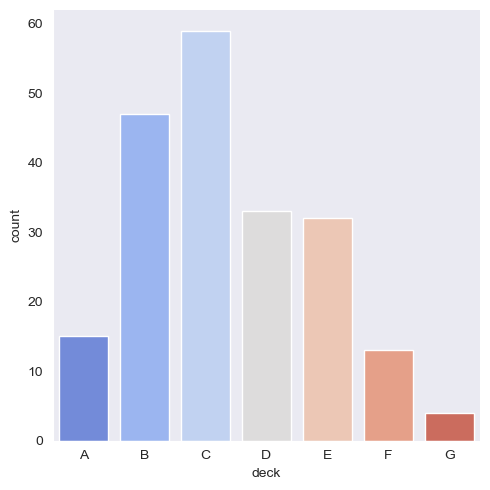

In [115]:
sns.catplot(data=titanic, x="deck",  kind="count", palette ="coolwarm")

### Linear Regression

In [117]:
df=pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [118]:
tips = sns.load_dataset("tips")

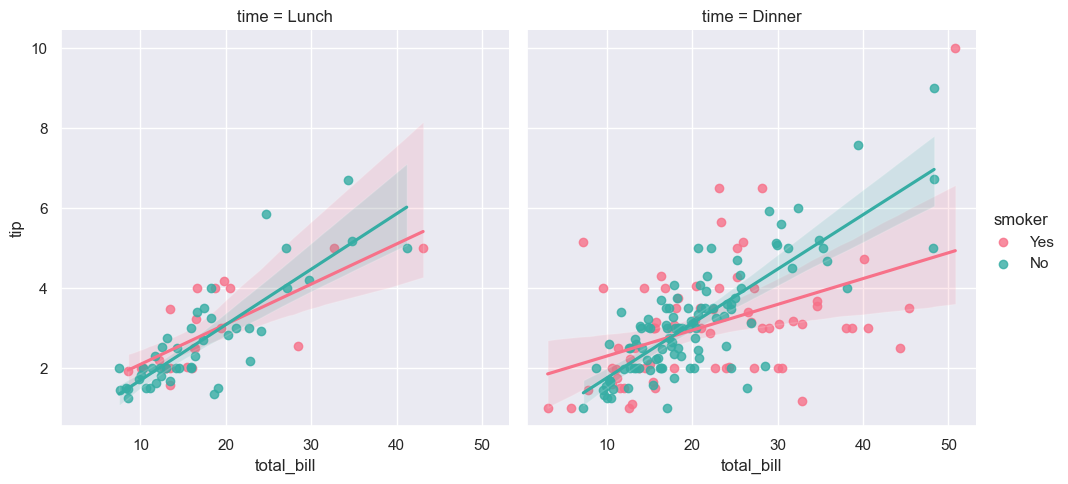

In [122]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker",palette ="husl")

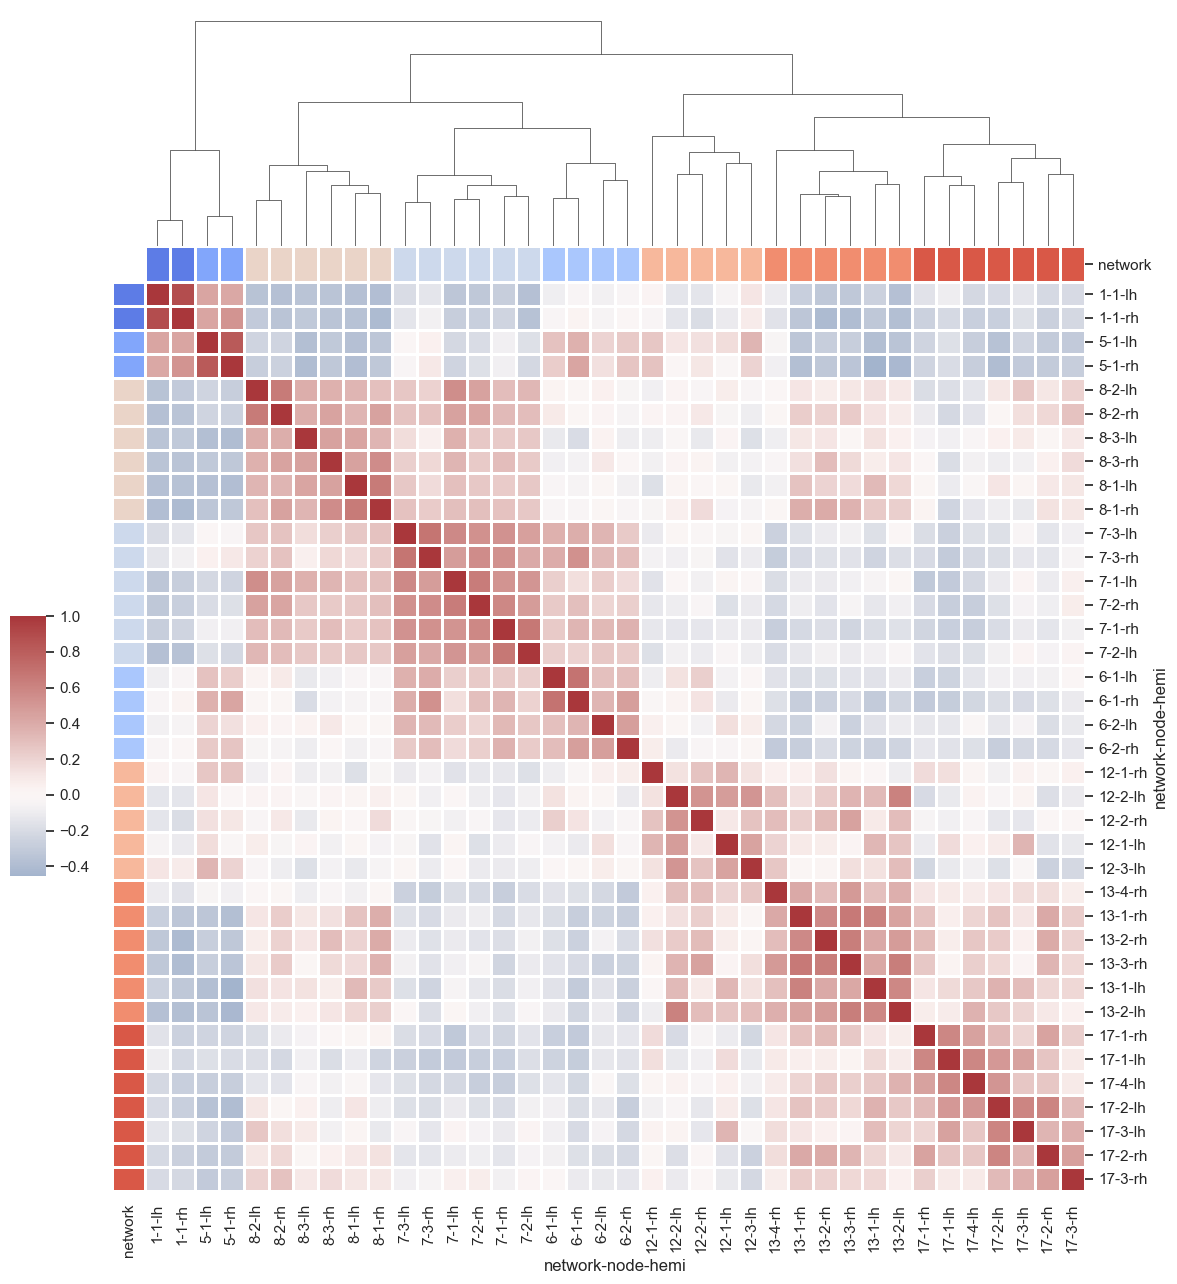

In [121]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.color_palette("coolwarm", 8)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

# thực hành với dữ liệu 'diamonds '

In [82]:
df=sns.load_dataset('diamonds')

In [83]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


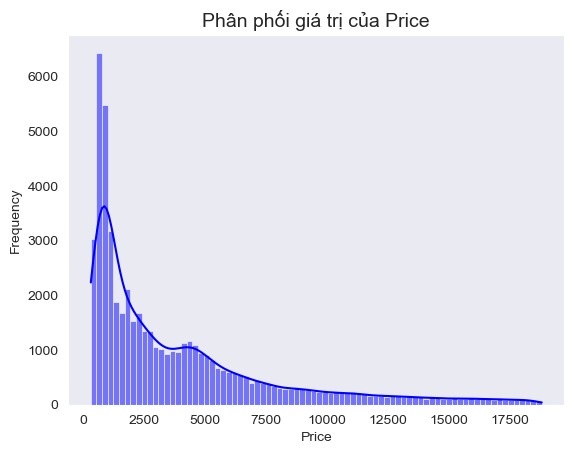

In [85]:
# Biểu đồ 1
sns.histplot(data=df, x="price", kde=True, color="blue")
plt.title("Phân phối giá trị của Price", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


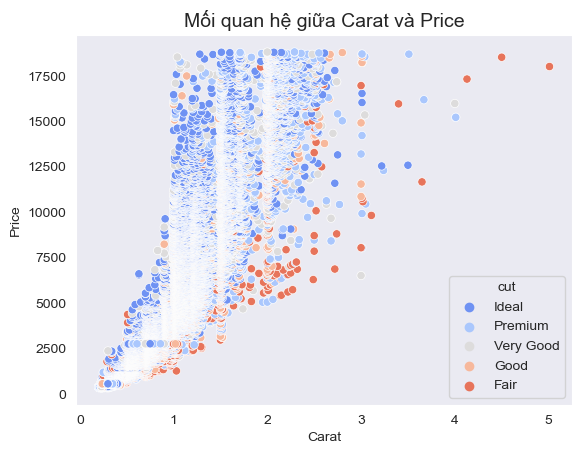

In [88]:
# Biểu đồ 2
sns.scatterplot(data=df, x="carat", y="price", hue="cut", palette="coolwarm")
plt.title("Mối quan hệ giữa Carat và Price", fontsize=14)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()


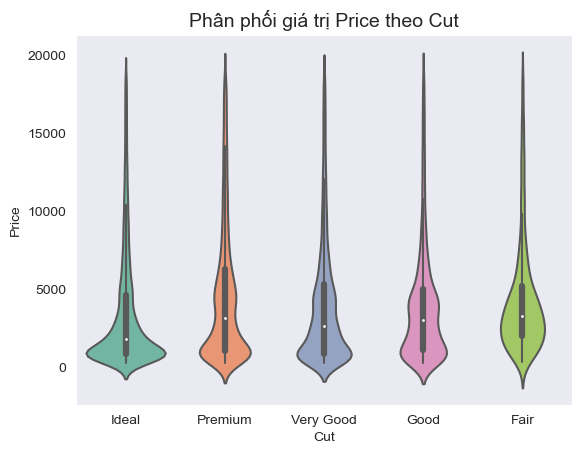

In [89]:
# Biểu đồ 3
sns.violinplot(data=df, x="cut", y="price", palette="Set2")
plt.title("Phân phối giá trị Price theo Cut", fontsize=14)
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()


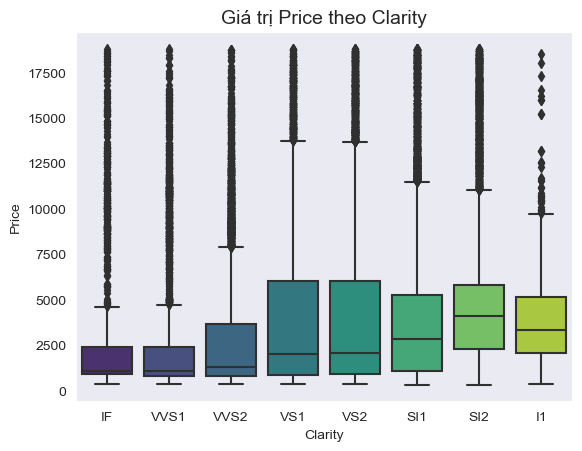

In [90]:
# Biểu đồ 4
sns.boxplot(data=df, x="clarity", y="price", palette="viridis")
plt.title("Giá trị Price theo Clarity", fontsize=14)
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.show()


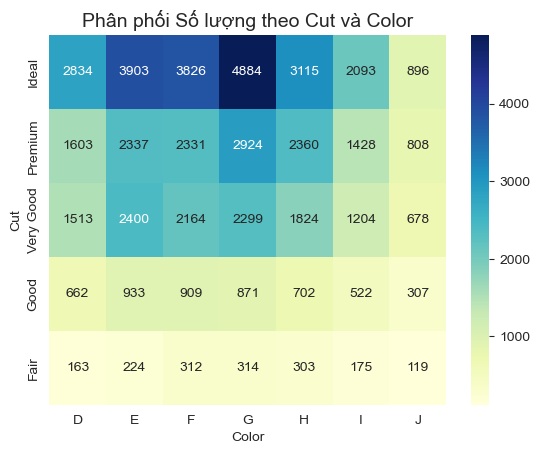

In [91]:
#Biểu đồ 5
pivot_table = pd.pivot_table(df, values="price", index="cut", columns="color", aggfunc="count", fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Phân phối Số lượng theo Cut và Color", fontsize=14)
plt.xlabel("Color")
plt.ylabel("Cut")
plt.show()


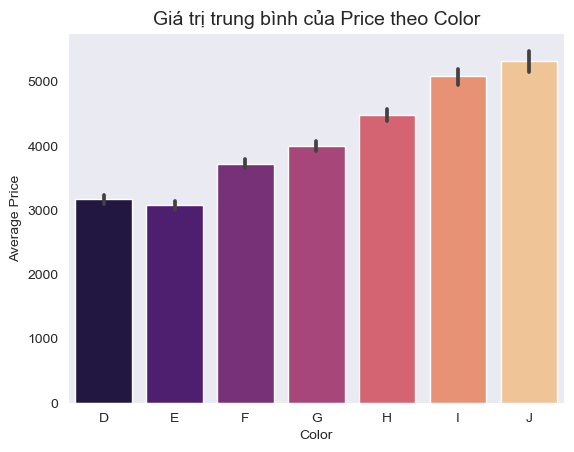

In [92]:
# Biểu đồ 6
sns.barplot(data=df, x="color", y="price", palette="magma")
plt.title("Giá trị trung bình của Price theo Color", fontsize=14)
plt.xlabel("Color")
plt.ylabel("Average Price")
plt.show()


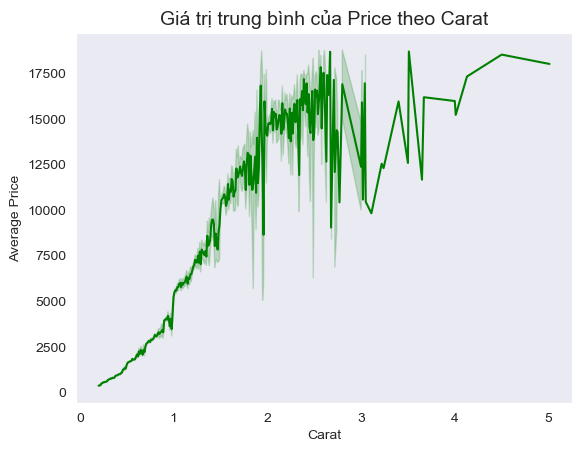

In [93]:
# BIểu đồ 7
sns.lineplot(data=df, x="carat", y="price", color="green")
plt.title("Giá trị trung bình của Price theo Carat", fontsize=14)
plt.xlabel("Carat")
plt.ylabel("Average Price")
plt.show()


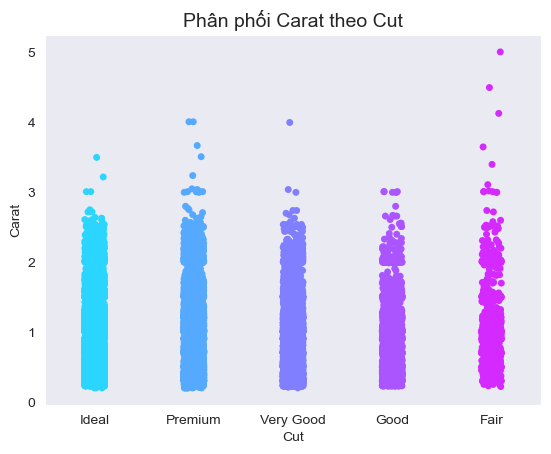

In [94]:
# BIểu đồ 8
sns.stripplot(data=df, x="cut", y="carat", jitter=True, palette="cool")
plt.title("Phân phối Carat theo Cut", fontsize=14)
plt.xlabel("Cut")
plt.ylabel("Carat")
plt.show()


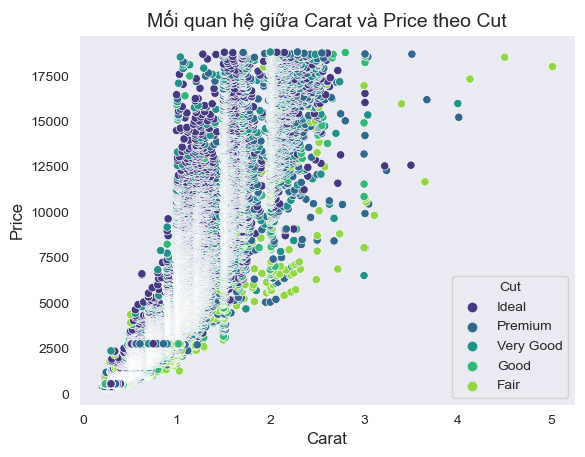

In [96]:
# BIểu đồ 9

# Vẽ scatterplot đơn giản giữa hai cột
sns.scatterplot(data=df, x="carat", y="price", hue="cut", palette="viridis")

# Thêm tiêu đề và nhãn
plt.title("Mối quan hệ giữa Carat và Price theo Cut", fontsize=14)
plt.xlabel("Carat", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(title="Cut")
plt.show()



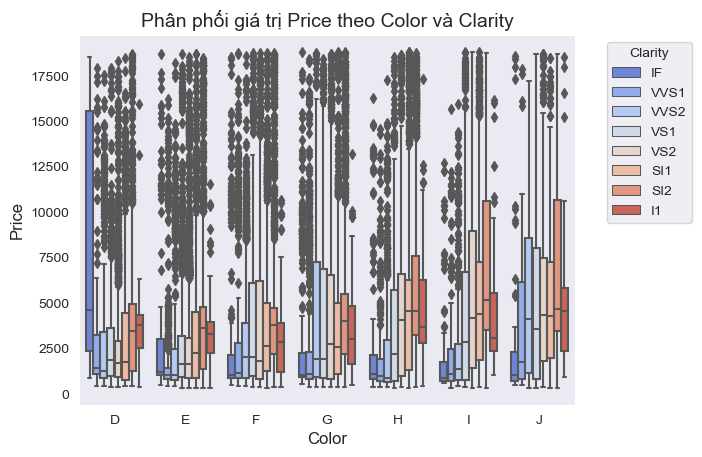

In [98]:
# Biểu đồ 10
sns.boxplot(data=df, x="color", y="price", hue="clarity", palette="coolwarm")
plt.title("Phân phối giá trị Price theo Color và Clarity", fontsize=14)
plt.xlabel("Color", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(title="Clarity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
